In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat,normalize='true')
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")

# 0 : DRAW, 1 : HOME WIN, 2: AWAY WIN
df = pd.read_csv('../data/games_data.csv') 
df = df.drop(['odds_home', 'odds_away', 'odds_draw'], axis=1)

In [5]:
x = df[[x for x in df.columns if x != 'result']]
y = df['result']
(y.value_counts()/y.shape[0])*100

1    45.068600
2    29.657434
0    25.273967
Name: result, dtype: float64

In [6]:
x = df[[x for x in df.columns if x != 'result']]
y = df['result']

# nomalize the data (is this necessary)
column_maxes = x.max()
x_max = column_maxes.max()
normalized_x = x / x_max

x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42, stratify=y)

Accuracy on train is : 45.07%
Accuracy on test is  : 45.06%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1172
           1       0.45      1.00      0.62      2089
           2       0.00      0.00      0.00      1375

    accuracy                           0.45      4636
   macro avg       0.15      0.33      0.21      4636
weighted avg       0.20      0.45      0.28      4636

f1_score_train 28.01
f1_score_test 27.99


/Users/ycammarata/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ycammarata/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ycammarata/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


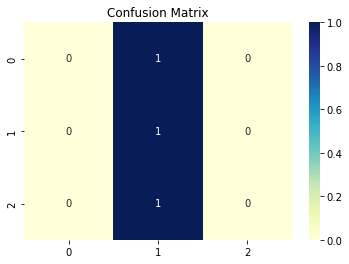

In [24]:
from sklearn.dummy import DummyClassifier

classifier = DummyClassifier()
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train is : %.2f%%" % (accuracy * 100.0))

y_test_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test is  : %.2f%%" % (accuracy * 100.0))

evaluate(y_test, y_test_pred, {0,1,2})

print('f1_score_train',round(f1_score(y_train, y_train_pred, average='weighted')*100,2))
print('f1_score_test', round(f1_score(y_test, y_test_pred, average='weighted')*100,2))


Accuracy on train is : 52.03%
Accuracy on test is : 50.56%
              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1172
           1       0.52      0.83      0.64      2089
           2       0.46      0.45      0.46      1375

    accuracy                           0.51      4636
   macro avg       0.41      0.43      0.37      4636
weighted avg       0.44      0.51      0.42      4636



/Users/ycammarata/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


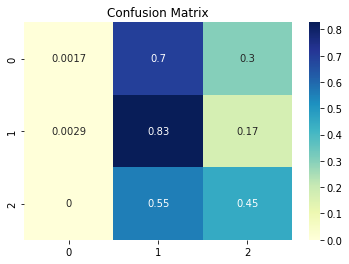

In [8]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant')

mlp_classifier.fit(x_train, y_train)

y_train_pred = mlp_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train is : %.2f%%" % (accuracy * 100.0))

y_test_pred = mlp_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test is : %.2f%%" % (accuracy * 100.0))

evaluate(y_test, y_test_pred, {0,1,2})

In [169]:
#####
#### PROCESSING TIME is about 12 hours on Mac M1
#### Best are  solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant')
######

""" from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=4)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred)) """

' from sklearn.model_selection import GridSearchCV\n\nparameter_space = {\n    \'hidden_layer_sizes\': [(50,50,50), (50,100,50), (100,)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'alpha\': [0.0001, 0.05],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\nclf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=4)\nclf.fit(x_train, y_train)\n\n# Best paramete set\nprint(\'Best parameters found:\n\', clf.best_params_)\n\n# All results\nmeans = clf.cv_results_[\'mean_test_score\']\nstds = clf.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))\n\n\ny_true, y_pred = y_test , clf.predict(x_test)\n\nfrom sklearn.metrics import classification_report\nprint(\'Results on the test set:\')\nprint(classification_report(y_true, y_pred)) '

Accuracy on train is : 49.36%
Accuracy on test is : 47.58%
              precision    recall  f1-score   support

           0       0.26      0.13      0.17      1172
           1       0.58      0.59      0.58      2089
           2       0.43      0.60      0.50      1375

    accuracy                           0.48      4636
   macro avg       0.42      0.44      0.42      4636
weighted avg       0.45      0.48      0.45      4636



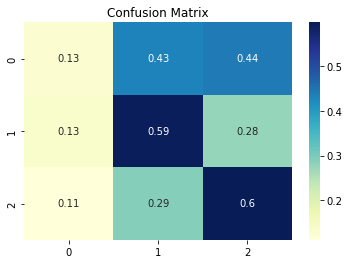

In [15]:
from sklearn.linear_model import RidgeClassifier

ridge_classifier = RidgeClassifier(class_weight='balanced', max_iter=10000, alpha=1.080001, solver='sag')
ridge_classifier.fit(x_train, y_train)

y_train_pred = ridge_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train is : %.2f%%" % (accuracy * 100.0))

y_test_pred = ridge_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test is : %.2f%%" % (accuracy * 100.0))

evaluate(y_test, y_test_pred, {0,1,2})

Accuracy on train is : 46.82%
Accuracy on test is : 44.80%
              precision    recall  f1-score   support

           0       0.27      0.39      0.32      1172
           1       0.62      0.49      0.55      2089
           2       0.47      0.44      0.45      1375

    accuracy                           0.45      4636
   macro avg       0.45      0.44      0.44      4636
weighted avg       0.48      0.45      0.46      4636



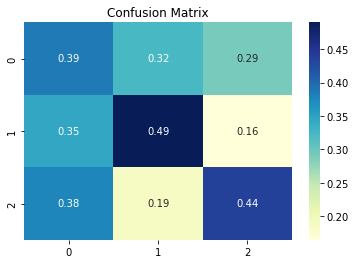

In [28]:
from sklearn.svm import SVC

svc_classifier = SVC(gamma=2, C=1, class_weight='balanced')
svc_classifier.fit(x_train, y_train)

y_train_pred = svc_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train is : %.2f%%" % (accuracy * 100.0))

y_test_pred = svc_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test is : %.2f%%" % (accuracy * 100.0))

evaluate(y_test, y_test_pred, {0,1,2})

In [90]:
team_stats = pd.read_csv('england_stats.csv')
team_stats.head()

,name,odds_home,odds_away,odds_draw,home_wins,home_draws,home_losses,home_goals,home_opposition_goals,home_shots,...,away_wins,away_draws,away_losses,away_goals,away_opposition_goals,away_shots,away_shots_on_target,away_opposition_shots,away_opposition_shots_on_target,league
0,Southampton,2.256667,3.206667,3.433333,3.0,5.0,4.0,9.0,14.0,129.0,...,3.0,5.0,4.0,10.0,17.0,140.0,40.0,128.0,46.0,England
1,Man United,2.733333,3.983333,4.026667,5.0,2.0,5.0,19.0,21.0,160.0,...,4.0,2.0,5.0,14.0,20.0,149.0,49.0,154.0,52.0,England
2,Brentford,2.033333,4.150000,3.500000,3.0,3.0,5.0,14.0,19.0,123.0,...,3.0,3.0,5.0,14.0,17.0,127.0,47.0,132.0,49.0,England
3,Chelsea,1.322500,10.750000,5.562500,8.0,2.0,2.0,26.0,9.0,175.0,...,7.0,3.0,1.0,25.0,9.0,178.0,64.0,108.0,35.0,England
4,Crystal Palace,2.275000,3.275000,3.275000,3.0,6.0,3.0,18.0,14.0,129.0,...,3.0,6.0,3.0,17.0,15.0,128.0,42.0,123.0,47.0,England


In [139]:
def get_result(predictor, HomeTeam, AwayTeam):
   
   home_stat = team_stats[team_stats['name']==HomeTeam][['home_wins',
       'home_draws', 'home_losses', 'home_goals', 'home_opposition_goals',
       'home_shots', 'home_shots_on_target', 'home_opposition_shots',
       'home_opposition_shots_on_target']]

   away_stat = team_stats[team_stats['name']==AwayTeam][['away_wins', 'away_draws',
       'away_losses', 'away_goals', 'away_opposition_goals', 'away_shots',
       'away_shots_on_target', 'away_opposition_shots',
       'away_opposition_shots_on_target']]

   stats = np.concatenate((home_stat.values.reshape(-1), away_stat.values.reshape(-1)))
   #stats = np.concatenate((home_stat.values.reshape(-1), home_stat.values.reshape(-1)))

   #stats = stats/x_max
   
   result = predictor.predict([stats])[0]

   print(predictor.predict_proba([stats]))

   if (result==0):
      return 'D'

   if (result==1):
      return 'H'

   return'A'
    

In [137]:
#last_games = pd.read_csv('last_eng.csv')
URL_FRANCE_LEAGUE = 'https://www.football-data.co.uk/mmz4281/2122/F1.csv'
URL_ENGLAND_LEAGUE = 'https://www.football-data.co.uk/mmz4281/2122/E0.csv'

last_games = pd.read_csv(URL_ENGLAND_LEAGUE).tail(20)

last_games.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
186,E0,02/01/2022,14:00,Brentford,Aston Villa,2,1,H,1,1,...,1.72,0.00,2.04,1.89,2.06,1.88,2.21,1.92,2.03,1.86
187,E0,02/01/2022,14:00,Everton,Brighton,2,3,A,0,2,...,1.62,0.00,2.11,1.82,2.01,1.92,2.13,2.07,2.00,1.88
188,E0,02/01/2022,14:00,Leeds,Burnley,3,1,H,1,0,...,2.01,-0.50,2.10,1.83,2.11,1.81,2.14,1.90,2.06,1.84
189,E0,02/01/2022,16:30,Chelsea,Liverpool,2,2,D,2,2,...,2.11,0.00,1.87,2.06,1.94,1.98,2.01,2.06,1.90,1.98
190,E0,03/01/2022,17:30,Man United,Wolves,0,1,A,0,0,...,1.75,-0.75,2.00,1.95,1.97,1.95,2.00,2.15,1.90,1.99


In [140]:
import warnings
warnings.filterwarnings("ignore")

good_score = 0
bad_score = 0
for idx, game in last_games.iterrows():
    pred = get_result(mlp_classifier,last_games.loc[idx, 'HomeTeam'], last_games.loc[idx, 'AwayTeam'])
    #if (last_games.loc[idx, 'FTR']=='D'):
    #    continue

    if (pred ==  last_games.loc[idx, 'FTR']):
        print ('{} versus {} : {} {} GOOD PREDICTION'.format(
            last_games.loc[idx, 'HomeTeam'], 
            last_games.loc[idx, 'AwayTeam'],
            last_games.loc[idx, 'FTR'],
            pred))
        good_score += 1
    else:
        print ('{} versus {} : {} {} BAD PREDICTION'.format(
            last_games.loc[idx, 'HomeTeam'], 
            last_games.loc[idx, 'AwayTeam'],
            last_games.loc[idx, 'FTR'],
            pred))
        bad_score += 1

print(good_score, bad_score)
print('Pourcentage bonne predictions : ', (good_score)/(good_score+bad_score))

[[4.22383164e-155 1.00000000e+000 5.67357766e-135]]
Tottenham versus Crystal Palace : H H GOOD PREDICTION
[[5.64613862e-262 1.00000000e+000 1.29684097e-272]]
West Ham versus Southampton : A H BAD PREDICTION
[[1.39520284e-134 6.69029877e-012 1.00000000e+000]]
Aston Villa versus Chelsea : A A GOOD PREDICTION
[[2.25836457e-134 1.00000000e+000 1.84426497e-143]]
Brighton versus Brentford : H H GOOD PREDICTION
[[8.12174796e-136 1.00000000e+000 2.77317096e-117]]
Newcastle versus Man United : D H BAD PREDICTION
[[2.5320416e-202 1.0000000e+000 2.5476804e-262]]
Crystal Palace versus Norwich : H H GOOD PREDICTION
[[1.06620600e-143 1.00000000e+000 8.25582119e-184]]
Southampton versus Tottenham : D H BAD PREDICTION
[[1.00182625e-152 1.00000000e+000 1.91904032e-104]]
Watford versus West Ham : A H BAD PREDICTION
[[2.37832104e-165 1.07455137e-035 1.00000000e+000]]
Leicester versus Liverpool : H A BAD PREDICTION
[[4.76220588e-291 1.00000000e+000 0.00000000e+000]]
Chelsea versus Brighton : D H BAD PREDI

In [20]:
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, accuracy_score

names = [
    "Neural Net",
    "Dummy (baseline)",
    "Logistic",
    "Ridge",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    MLPClassifier(solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant'),
    DummyClassifier(),
    LogisticRegression(class_weight='balanced', solver='liblinear'),
    RidgeClassifier(class_weight='balanced', max_iter=10000, alpha=1.08, solver='sag'),
    KNeighborsClassifier(3, n_jobs=-1),
    SVC(kernel="linear", C=0.025, class_weight='balanced'),
    SVC(gamma=2, C=1, class_weight='balanced'),
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto', class_weight='balanced', n_jobs=-1),
    AdaBoostClassifier(),
    GaussianNB(var_smoothing=0.657933224657568),
]

results = pd.DataFrame(columns=['classifier', 'accuracy_train', 'f1_train', 'accuracy_test', 'f1_test'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    f1_score_train = round(f1_score(y_train, y_train_pred, average='weighted')*100,2)
    f1_score_test = round(f1_score(y_test, y_test_pred, average='weighted')*100,2)
    score_train = round(accuracy_score(y_train, y_train_pred)*100, 2)
    score_test = round(accuracy_score(y_test, y_test_pred)*100, 2)

    print('Accuracy (train, test) for classifier {} are : {}%, {}%, f1 : {}, {}'.format(name, score_train, score_test, f1_score_train, f1_score_test))

    result = {'classifier':name, 'accuracy_train':score_train, 'f1_train':f1_score_train, 'accuracy_test':score_test, 'f1_test':f1_score_test}
    print(result)
    results = results.append(result, ignore_index=True)

/Users/ycammarata/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy (train, test) for classifier Neural Net are : 51.97%, 50.63%, f1 : 43.78, 42.59
{'classifier': 'Neural Net', 'accuracy_train': 51.97, 'f1_train': 43.78, 'accuracy_test': 50.63, 'f1_test': 42.59}
Accuracy (train, test) for classifier Dummy (baseline) are : 45.07%, 45.06%, f1 : 28.01, 27.99
{'classifier': 'Dummy (baseline)', 'accuracy_train': 45.07, 'f1_train': 28.01, 'accuracy_test': 45.06, 'f1_test': 27.99}
Accuracy (train, test) for classifier Logistic are : 50.82%, 49.85%, f1 : 44.72, 43.71
{'classifier': 'Logistic', 'accuracy_train': 50.82, 'f1_train': 44.72, 'accuracy_test': 49.85, 'f1_test': 43.71}
Accuracy (train, test) for classifier Ridge are : 49.34%, 47.58%, f1 : 47.44, 45.41
{'classifier': 'Ridge', 'accuracy_train': 49.34, 'f1_train': 47.44, 'accuracy_test': 47.58, 'f1_test': 45.41}
Accuracy (train, test) for classifier Nearest Neighbors are : 67.5%, 42.19%, f1 : 67.84, 42.56
{'classifier': 'Nearest Neighbors', 'accuracy_train': 67.5, 'f1_train': 67.84, 'accuracy_te

In [21]:
results.head(15).sort_values('f1_test', ascending=False)

,classifier,accuracy_train,f1_train,accuracy_test,f1_test
6,RBF SVM,46.82,47.91,44.80,46.00
3,Ridge,49.34,47.44,47.58,45.41
5,Linear SVM,46.19,47.19,44.03,45.11
8,Random Forest,47.10,48.26,43.53,44.69
2,Logistic,50.82,44.72,49.85,43.71
7,Decision Tree,46.61,47.32,42.77,43.47
9,AdaBoost,51.87,43.80,50.63,42.66
0,Neural Net,51.97,43.78,50.63,42.59
4,Nearest Neighbors,67.50,67.84,42.19,42.56
10,Naive Bayes,51.31,42.85,50.24,41.89


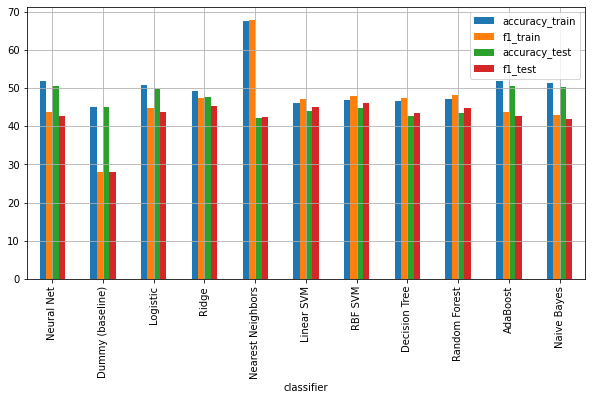

In [25]:

ax = results.plot(x='classifier', kind='bar', figsize=(10,5), grid=True)


In [129]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=15,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.657933224657568}

Accuracy on train is : 51.31%
Accuracy on test is : 50.24%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1172
           1       0.52      0.84      0.64      2089
           2       0.46      0.42      0.44      1375

    accuracy                           0.50      4636
   macro avg       0.33      0.42      0.36      4636
weighted avg       0.37      0.50      0.42      4636



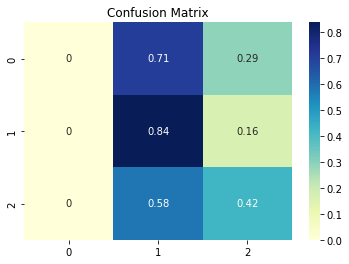

In [135]:
y_train_pred = gs_NB.best_estimator_.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train is : %.2f%%" % (accuracy * 100.0))

y_test_pred = gs_NB.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test is : %.2f%%" % (accuracy * 100.0))

evaluate(y_test, y_test_pred, {0,1,2})

In [141]:
# Visualize confusion matrices
import plotly.graph_objects as go
from plotly.subplots import make_subplots
cm_train = confusion_matrix(y_train, y_train_pred, normalize=True)
cm_test = confusion_matrix(y_test, y_test_pred, normalize=True)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("train", "test"), 
                    x_title = 'Prediction', y_title = 'True label')
fig.update_layout(
        title = go.layout.Title(text = "Confusion matrices", x = 0.5))
fig.update_yaxes(autorange='reversed')
fig.add_trace(
    go.Heatmap(
        name = 'train',
        x = ['Draw', 'Home', 'Away'], # put here the class labels
        y = ['Draw', 'Home', 'Away'], 
        z = cm_train,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 1
)  
fig.add_trace(
    go.Heatmap(
        name = 'test',
        x = ['Draw', 'Home', 'Away'], 
        y = ['Draw', 'Home', 'Away'], 
        z = cm_test,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 2
)

Automatically created module for IPython interactive environment


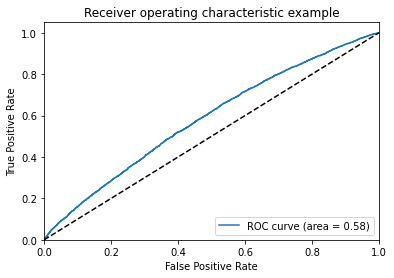

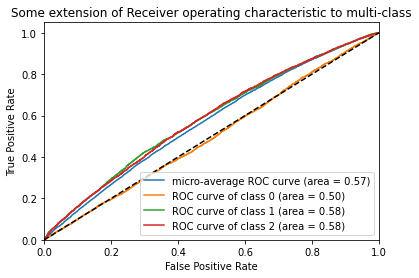

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

X = df[[x for x in df.columns if x != 'result']]
y = df['result']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='liblinear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
